In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv(r"D:\23_iNeuron_ML\10_01_2022\Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

Data Understanding
    1. The Data set has 12 columns and 247 rows.
    2. The Data had to be processed in order to get into proper data types (.i.e Categorical and Numerical )
    

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [409]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [5]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
df = df.dropna(axis = 0, how = 'all', thresh=4)

In [7]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
df_1 = df.loc[0:122]

In [9]:
df_1['Region'] = 1

C:\Users\user\AppData\Local\Temp/ipykernel_16504/2673887463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Region'] = 1


In [10]:
df_2 = df.drop([124],inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_16504/626630076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2 = df.drop([124],inplace=True)


In [11]:
df_2 = df.loc[124:]

In [12]:
df_2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [13]:
df_2['Region'] = 0

C:\Users\user\AppData\Local\Temp/ipykernel_16504/3082136290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Region'] = 0


In [14]:
df_f = pd.concat([df_1,df_2],axis=0)

In [15]:
df_f.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [16]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [17]:
df_fc=df_f[['Classes  ']]

In [18]:
df_fc.head()

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire


In [19]:
df_fc['Classes  '] = df_fc['Classes  '].str.replace(" ", "")

C:\Users\user\AppData\Local\Temp/ipykernel_16504/633975976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fc['Classes  '] = df_fc['Classes  '].str.replace(" ", "")


In [20]:
df_fd = df_f.drop(['Classes  '],axis=1)

In [21]:
df_fd.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

In [22]:
df_fd.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1


In [23]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Region       244 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 28.6+ KB


In [431]:
# df_fd.to_csv("wd1.csv")

In [432]:
# df_fd['Rain '] = df_fd['Rain '].astype('float')
# df_fd['Rain '] = df_fd['Rain '].astype('float')

In [24]:
for col in df_fd.columns:
    df_fd[col] = df_fd[col].astype('float')

In [25]:
df_fd.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [26]:
df_f1 = df_fd.join(df_fc)

In [27]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [28]:
df_f1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0.0,fire
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,notfire
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,notfire
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,notfire
246,30.0,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0.0,notfire


In [29]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    float64
 14  Classes      243 non-null    object 
dtypes: float64(14), object(1)
memory usage: 38.6+ KB


In [30]:
df_f1.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire


# Visualizing the patterns of missing value

In [31]:
df_f1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        1
dtype: int64

In [32]:
df_f1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes  '],
      dtype='object')

<AxesSubplot:>

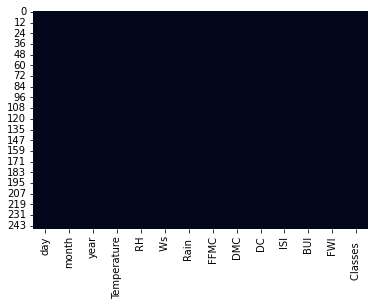

In [33]:
sns.heatmap(df.isnull(), cbar=False)

In [34]:
df_f1[df_f1['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
168,14.0,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,14.69,12.5,10.4,8.3,0.0,NaN


In [35]:
df_f1['Classes  '].mode()

0    fire
Name: Classes  , dtype: object

In [36]:
df_f1['Classes  '].fillna(value = 'fire', inplace = True)

Comment: 
    Missing value has been filled with 'mode' 
    
    

In [37]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [38]:
df_f1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

## Univariate Analysis - Numerical Variables

<AxesSubplot:ylabel='Frequency'>

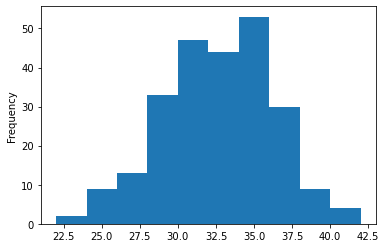

In [39]:
df_f1['Temperature'].plot.hist()

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

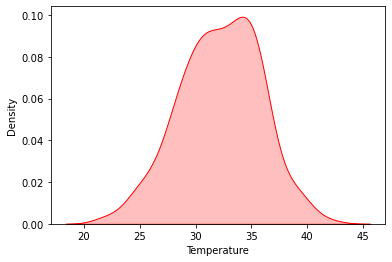

In [40]:
# Plotting the KDE Plot
sns.kdeplot(df_f1['Temperature'], color='r', shade=True)

<AxesSubplot:>

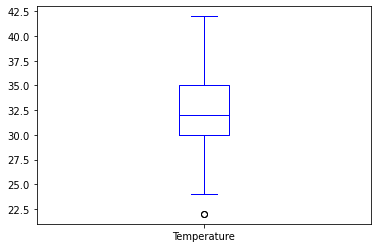

In [41]:
df_f1.boxplot(column=['Temperature'], grid=False, color='blue')

In [42]:
print("Minimum temperature:")
df_f1['Temperature'].min()

Minimum temperature:


22.0

In [43]:
print("Maximum temperature:")
df_f1['Temperature'].max()

Maximum temperature:


42.0

In [44]:
print("Mean temperature:")
df_f1['Temperature'].mean()

Mean temperature:


32.17213114754098

In [45]:
print("Mode temperature:")
df_f1['Temperature'].mode()

Mode temperature:


0    35.0
Name: Temperature, dtype: float64

Observation:

<AxesSubplot:ylabel='Frequency'>

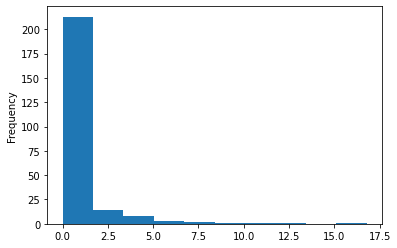

In [46]:
# Plotting the Histogram
df_f1['Rain '].plot.hist()

<AxesSubplot:xlabel='Rain ', ylabel='Density'>

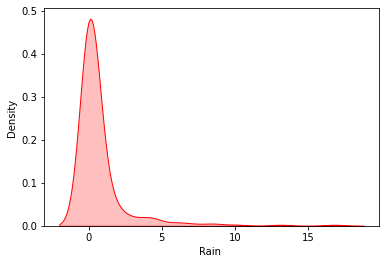

In [47]:
# Plotting the KDE Plot
sns.kdeplot(df_f1['Rain '], color='r', shade=True)

<AxesSubplot:>

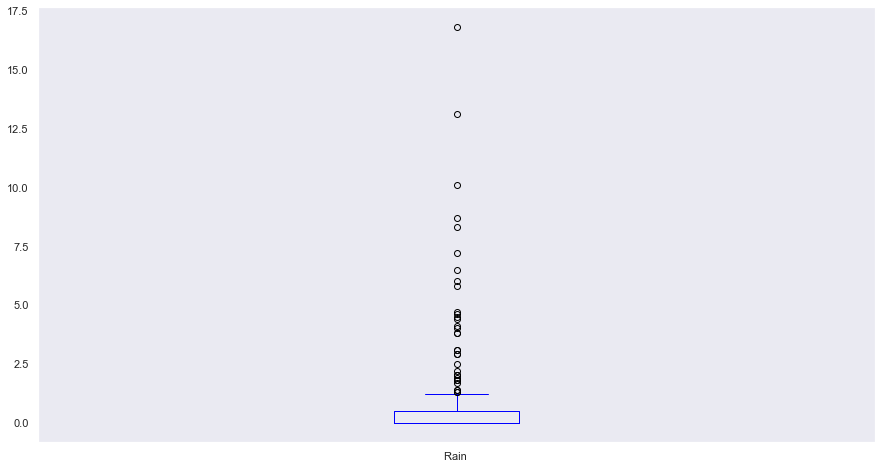

In [457]:
df_f1.boxplot(column=['Rain '], grid=False, color='blue')

In [458]:
print("Minimum rainfall:")
df_f1['Rain '].min()

Minimum rainfall:


0.0

In [459]:
print("Maximun rainfall:")
df_f1['Rain '].max()

Maximun rainfall:


16.8

In [51]:
print("Mean rainfall:")
df_f1['Rain '].mean()

Mean rainfall:


0.7606557377049175

Comment:

## Univariate Analysis - Categorical Variables

<AxesSubplot:>

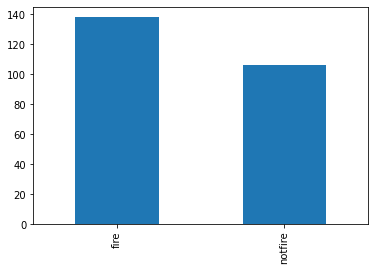

In [48]:
df_f1['Classes  '].value_counts().plot.bar()

In [49]:
df_f1['Classes  '].nunique()

2

Observation: We have 2 classes Fire and notfire

In [53]:
df_f1['Region'].value_counts()

1.0    122
0.0    122
Name: Region, dtype: int64

<AxesSubplot:>

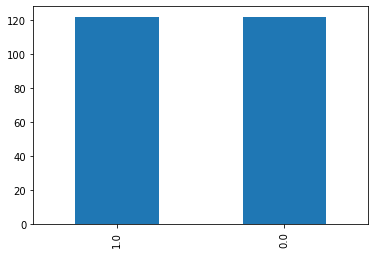

In [50]:
df_f1['Region'].value_counts().plot.bar()

Observation:
    Added a new column called Region where the regions are represented by 0 and 1
    Bejaia Region Dataset : 1 = count : 120
    Sidi-Bel Abbes Region Dataset : 0  = count : 120

## Multi-Variate Analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain ', ylabel='Temperature'>

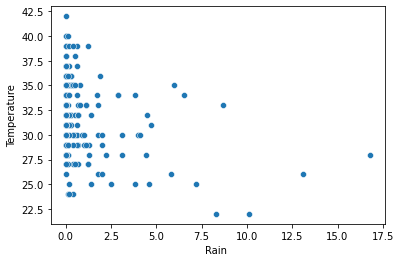

In [52]:
sns.scatterplot(df_f1['Rain '], df_f1['Temperature'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain ', ylabel='Classes  '>

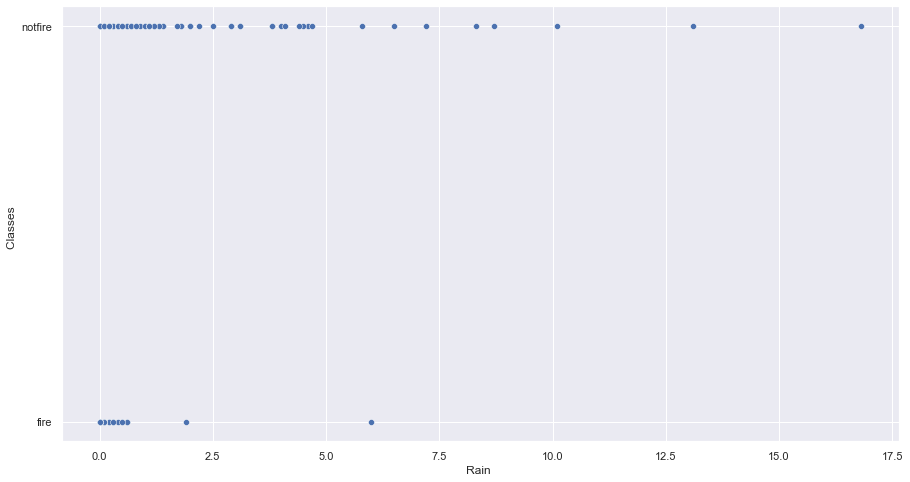

In [465]:
sns.scatterplot(df_f1['Rain '], df_f1['Classes  '])

<AxesSubplot:>

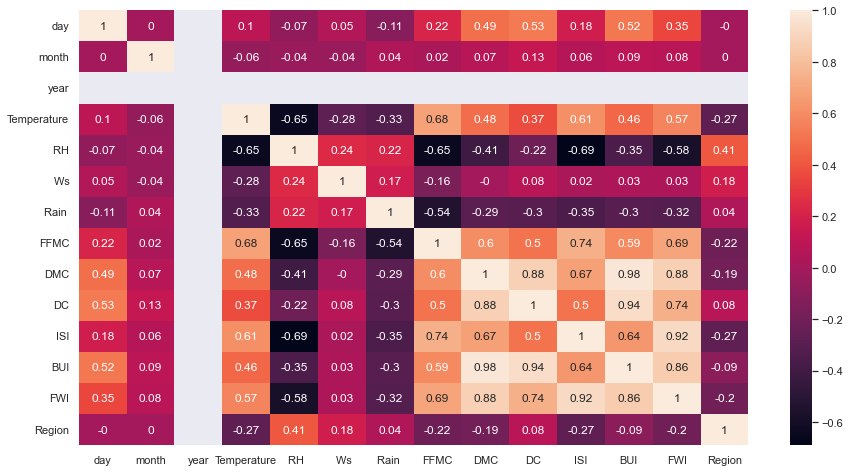

In [466]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(np.round(df_f1.corr(),2), annot=True)

Comment: From above we see that when rainfall increases chances of forest fire decreases.
Also heatmap 

Text(0.5, 1.0, 'Fire by Temperature')

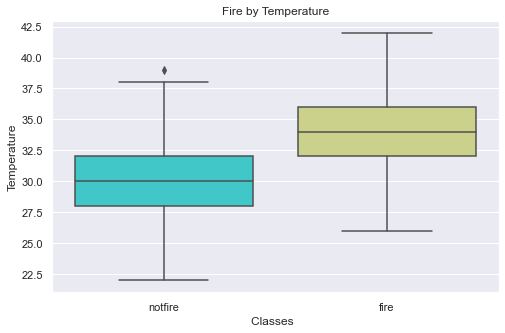

In [469]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Classes  ',y='Temperature',data=df_f1, palette='rainbow')
plt.title("Fire by Temperature")

Text(0.5, 1.0, 'Fire by Temperature')

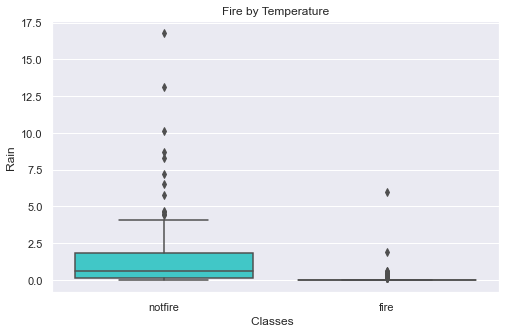

In [470]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Classes  ',y='Rain ',data=df_f1, palette='rainbow')
plt.title("Fire by Temperature")

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

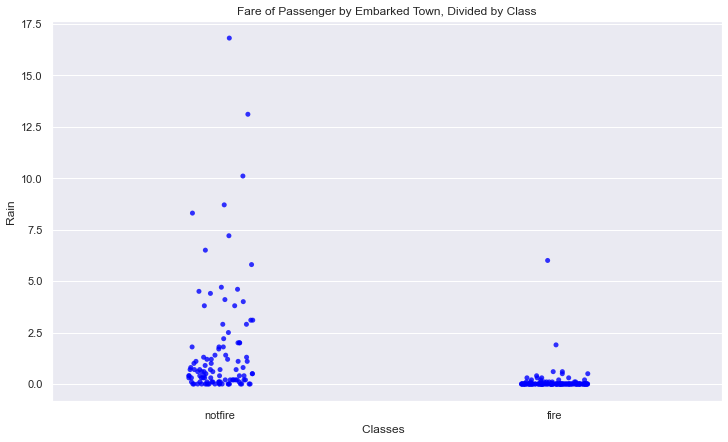

In [475]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Classes  ',y='Rain ',data=df_f1, dodge='True', color='blue', alpha=.8, s=5)
plt.title("Fire v/s Rain")

Text(0.5, 1.0, 'Fire v/s Temperature')

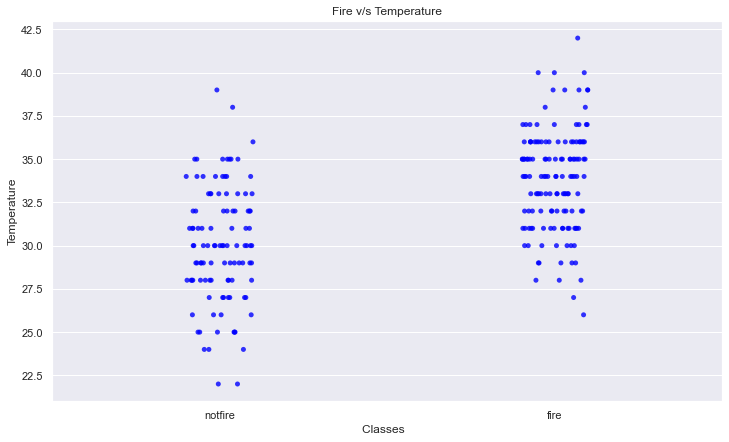

In [477]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Classes  ',y='Temperature',data=df_f1, dodge='True', color='blue', alpha=.8, s=5)
plt.title("Fire v/s Temperature")

In [480]:
df_f1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes  '],
      dtype='object')

Text(0.5, 1.0, 'Fire v/s Temperature')

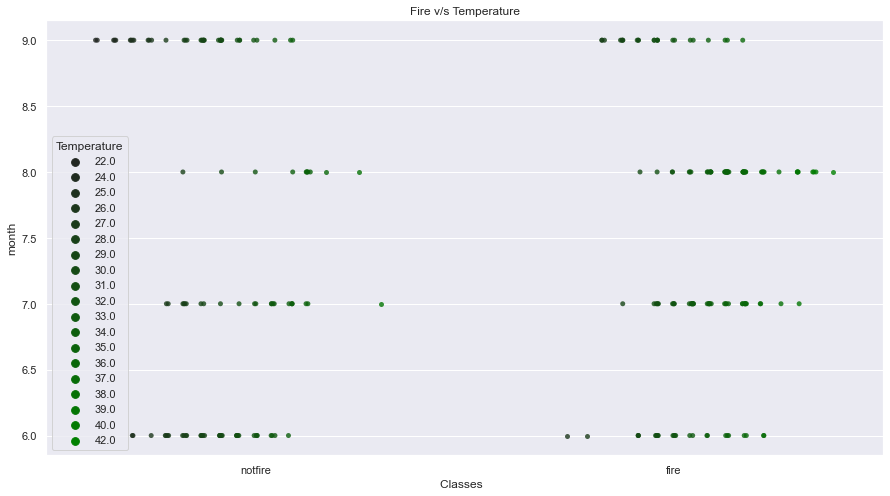

In [484]:
sns.stripplot(x='Classes  ',y='month',data=df_f1, hue='Temperature', dodge='True', color='green', alpha=.8, s=5)
plt.title("Fire v/s Temperature")

Text(0.5, 1.0, '')

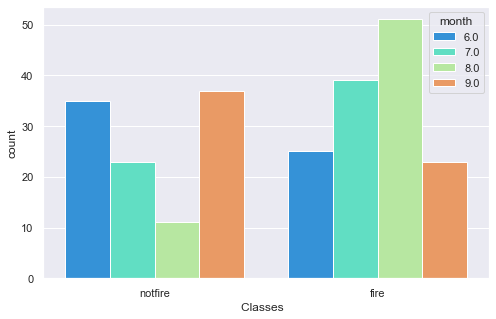

In [485]:
plt.figure(figsize=(8,5))
sns.countplot(x='Classes  ',data=df_f1, palette='rainbow',hue='month')
plt.title("")

In [486]:
df_f1['month'].value_counts()

7.0    62
8.0    62
6.0    60
9.0    60
Name: month, dtype: int64

Text(0.5, 1.0, '')

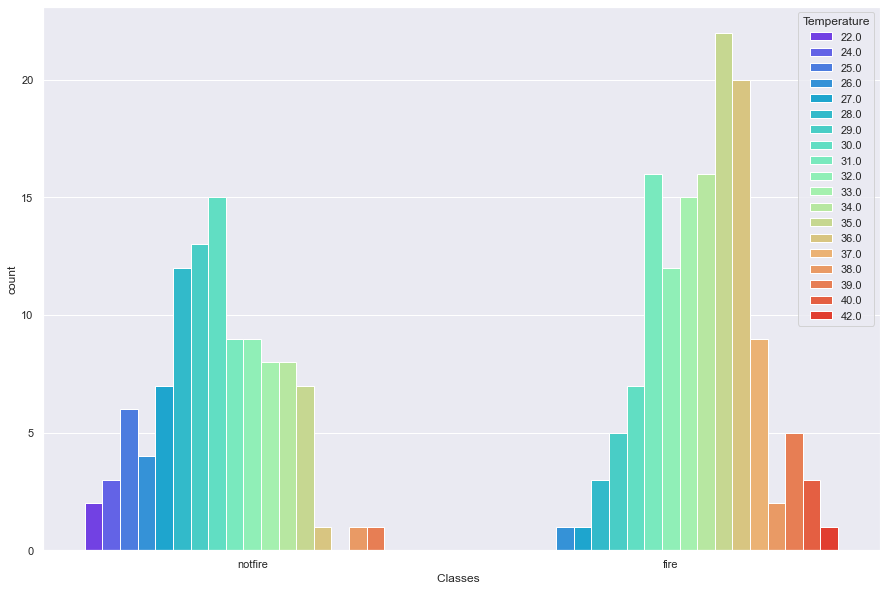

In [490]:
plt.figure(figsize=(15,10))
sns.countplot(x='Classes  ',data=df_f1, palette='rainbow',hue='Temperature')
plt.title("")

In [54]:
# Preparing Data for LR-Model 

In [81]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [82]:
df_f2 = df_f1.iloc[:,:-1] 

In [83]:
df_f2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [84]:
df_f2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

In [87]:
df_f2 = df_f2.drop(columns='year')

In [88]:
df_f2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [89]:
# Comments: Dropping the year column as it's value is same in all the rows 

In [90]:
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   Temperature  244 non-null    float64
 3    RH          244 non-null    float64
 4    Ws          244 non-null    float64
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Region       244 non-null    float64
dtypes: float64(13)
memory usage: 34.8 KB


In [91]:
df_f2.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.040574,0.500000
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425683,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,0.500000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [92]:
df_f2.isnull().sum()

day            0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [93]:
df_f2.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350592,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082285,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.565497,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.578717,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032936,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324546,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690786,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875674,-1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738160,8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.917586,-2.684206e-01


<AxesSubplot:>

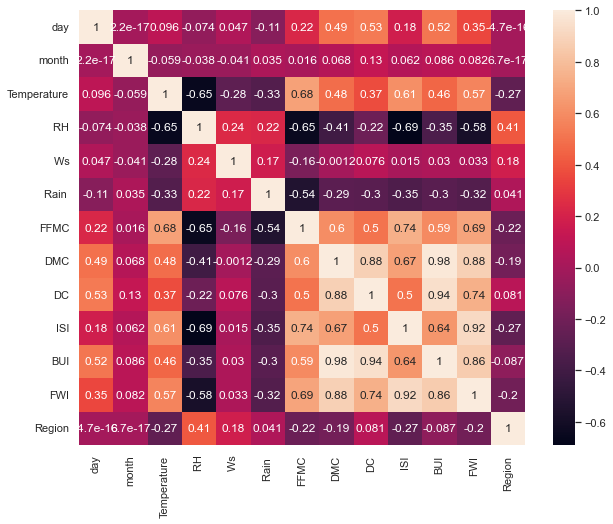

In [94]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_f2.corr(),annot=True)

Text(0, 0.5, 'Temperature')

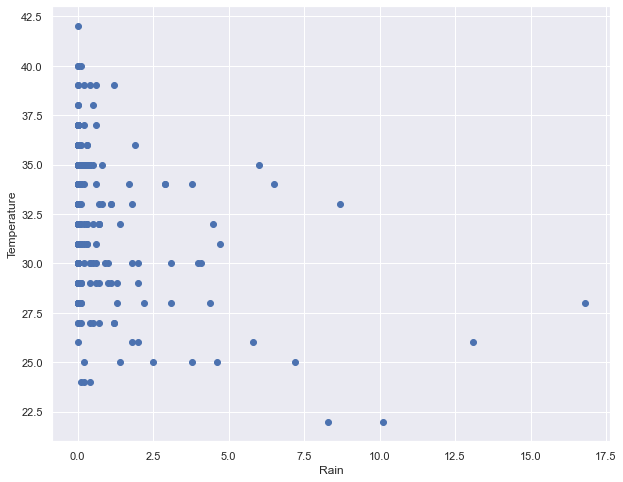

In [101]:
plt.scatter(df_f2['Rain '],df_f2['Temperature'])
plt.xlabel("Rain")
plt.ylabel("Temperature")

In [102]:
df_f2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [103]:
## Independent And Dependent Features

In [110]:
X=df_f2.drop(columns='Temperature')

In [111]:
y=df_f2.iloc[:,2:3]

In [113]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [112]:
y.head()

,Temperature
0,29.0
1,29.0
2,26.0
3,25.0
4,27.0


In [114]:
# Train test split

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)

In [116]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
240,24.0,9.0,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0
78,18.0,8.0,54.0,18.0,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0
25,26.0,6.0,64.0,18.0,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1.0
127,3.0,6.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0.0
179,25.0,7.0,64.0,9.0,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0.0


In [117]:
X_train.shape

(163, 12)

In [118]:
y_train.head()

,Temperature
240,26.0
78,36.0
25,31.0
127,29.0
179,39.0


In [119]:
y_train.shape

(163, 1)

In [120]:
# Feature Engineering

In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [124]:
X_train=scaler.fit_transform(X_train)

In [125]:
X_test=scaler.transform(X_test)

## Model Training

In [128]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [129]:
regression.fit(X_train,y_train)

LinearRegression()

In [130]:
## print the coefficients and the intercepts
print(regression.coef_)
print(regression.intercept_)

[[-0.14988515 -0.31132132 -1.13899351 -0.5932531  -0.20419161  1.0600991
  -0.08376865  1.12512988  0.26710033 -0.5758972   0.06134866 -0.28538167]]
[32.17791411]


In [131]:
## Prediction for the test data
reg_pred=regression.predict(X_test)
reg_pred

array([[31.94950561],
       [33.38648575],
       [33.15183633],
       [31.49508654],
       [32.81499843],
       [34.82587269],
       [33.90306147],
       [34.21686392],
       [31.91878679],
       [33.12767623],
       [33.65106012],
       [27.06378952],
       [35.21829605],
       [29.44074   ],
       [32.04313398],
       [32.30049682],
       [34.75554213],
       [27.15490519],
       [36.23215238],
       [34.38463974],
       [33.13759986],
       [34.61690611],
       [33.77298168],
       [33.17631731],
       [36.07667144],
       [29.48768659],
       [32.27642737],
       [31.90421289],
       [26.69010622],
       [32.34767918],
       [25.15713502],
       [26.94304427],
       [34.3407556 ],
       [32.18929292],
       [33.14756011],
       [30.62616697],
       [29.1827015 ],
       [32.39870229],
       [27.07631995],
       [35.53225193],
       [32.7332534 ],
       [33.99698893],
       [34.37047142],
       [31.33808476],
       [36.5369906 ],
       [33

Text(0, 0.5, 'Test Pred Data')

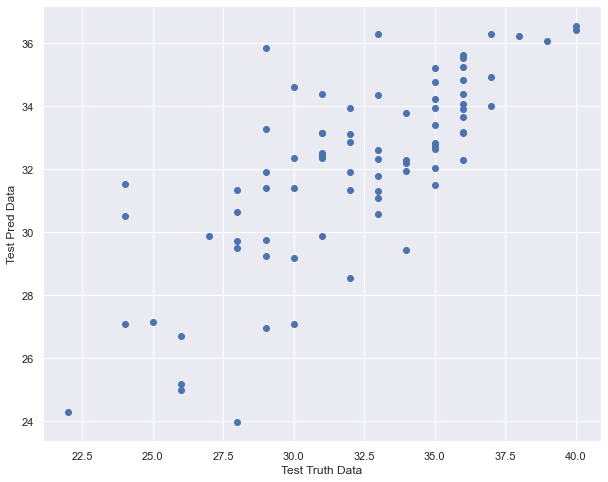

In [132]:
### Assumptions Of Liner Regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Pred Data")

In [133]:
## Residuals
residuals = y_test-reg_pred

In [134]:
residuals.head()

,Temperature
165,2.050494
60,1.613514
61,2.848164
63,3.504913
69,2.185002


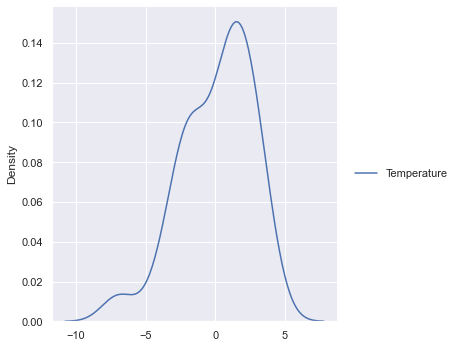

In [135]:
sns.displot(residuals,kind="kde")

In [ ]:
## Scatter plot with prediction and residual
## Uniform distribution

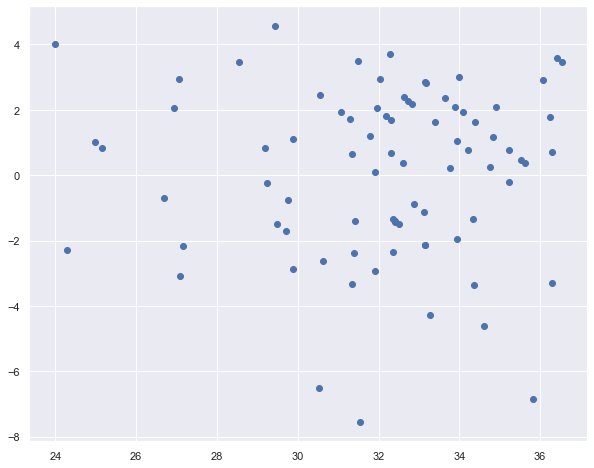

In [136]:
plt.scatter(reg_pred,residuals)

In [137]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [138]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_absolute_error(y_test,reg_pred)))

6.629070108175489
2.1303926790907384
1.4595864753726442


## Model Building Using Ridge Regression

In [139]:
# Rigid Regression 
from sklearn.linear_model import Ridge
ridge = Ridge()

In [140]:
# Fitting the model on train and test data
ridge.fit(X_train,y_train)

Ridge()

In [141]:
## printing the coefficients and the intercepts
print(ridge.coef_)
print(ridge.intercept_)

[[-0.14617918 -0.30198182 -1.13692753 -0.59033692 -0.21093913  1.04174599
  -0.23182185  0.96830567  0.28273651 -0.25434431  0.02535754 -0.27917739]]
[32.17791411]


In [142]:
# Predicting the value for y(ridge_pred) by passing test data 
ridge_pred=ridge.predict(X_test)

In [143]:
ridge_pred

array([[31.94610634],
       [33.3855079 ],
       [33.14887314],
       [31.50425127],
       [32.80970033],
       [34.82831479],
       [33.85264892],
       [34.13022988],
       [31.91545614],
       [33.11103932],
       [33.64587138],
       [27.09082272],
       [35.20047763],
       [29.42131178],
       [32.03982397],
       [32.29509868],
       [34.71865682],
       [27.20238435],
       [36.24122055],
       [34.40505341],
       [33.11647368],
       [34.53616132],
       [33.7619766 ],
       [33.17072052],
       [36.06922966],
       [29.4933674 ],
       [32.21544128],
       [31.94418464],
       [26.73610272],
       [32.35121604],
       [25.18653067],
       [26.97080681],
       [34.31070029],
       [32.18708301],
       [33.1285971 ],
       [30.61931359],
       [29.16876129],
       [32.38948119],
       [27.11385025],
       [35.49983784],
       [32.71363541],
       [33.99944883],
       [34.37557466],
       [31.3186787 ],
       [36.5152431 ],
       [33

Text(0, 0.5, 'Test Pred Data')

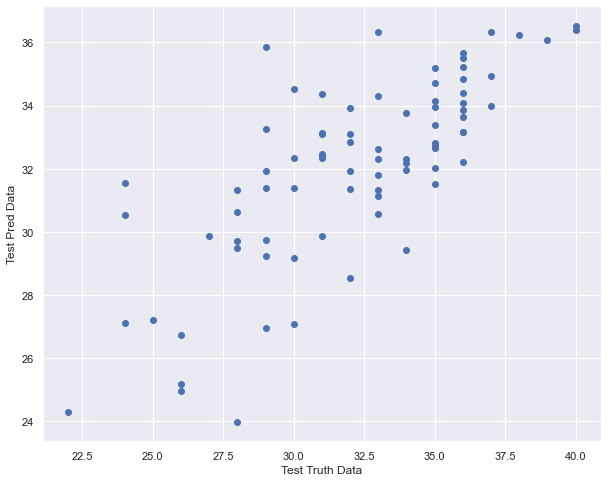

In [144]:
# Plotting the y_test data with predicted data(ridge_pred)
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Pred Data")

In [145]:
#Observation
# Predicted value of Price and Test Price value show a linear trend

In [146]:
# Subtracting ridge_pred from y_test to find the deviation(error)
ridge_residuals = y_test-ridge_pred

In [163]:
ridge_pred.shape

(81, 1)

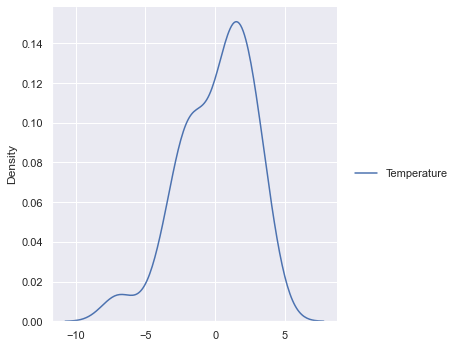

In [147]:
# ridge_residuals forms a proper bell curve
sns.displot(ridge_residuals,kind="kde")

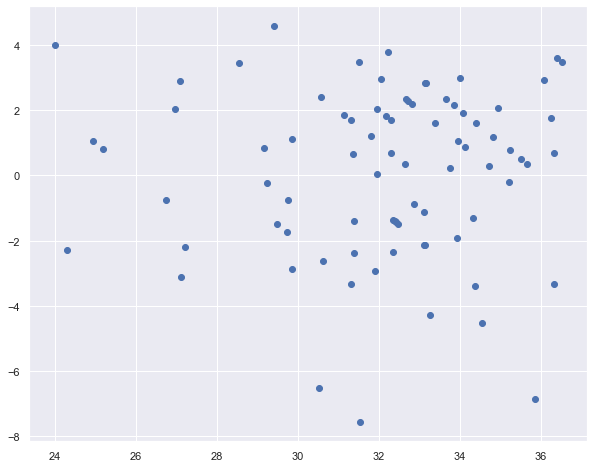

In [148]:
## Scatter plot with prediction and residual
## Uniform distribution
plt.scatter(ridge_pred,ridge_residuals)

In [149]:
## Performance Metrics
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_absolute_error(y_test,ridge_pred)))

6.630286006219479
2.1298488303850722
1.4594001611569982


## Model Building Using Lasso Regression

In [150]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [151]:
## printing the coefficients and the intercepts
print(lasso.coef_)
print(lasso.intercept_)

[ 0.         -0.         -0.71955751 -0.         -0.          0.89582004
  0.          0.          0.          0.          0.         -0.        ]
[32.17791411]


In [156]:
## Prediction for the test data
lasso_pred=lasso.predict(X_test)

Text(0, 0.5, 'Test Pred Data')

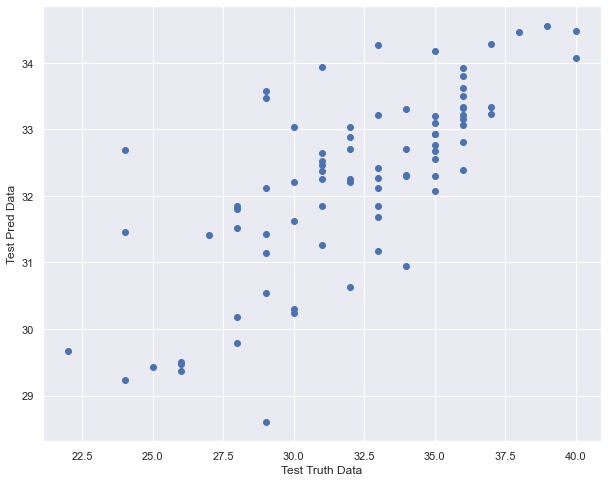

In [157]:
### Assumptions
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Pred Data")

In [158]:
#Observation
# Predicted value of Price and Test Price value show a linear trend

In [161]:
y_test.shape

(81, 1)

In [162]:
lasso_pred.shape

(81,)

In [164]:
## Residuals
# lasso_residuals = y_test-lasso_pred

In [160]:
## Performance Metrics
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_absolute_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
1.5804638802153226


## Model Building Using ElasticNET Regression

In [165]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train,y_train)

ElasticNet()

In [166]:
en_pred = en.predict(X_test)

Text(0, 0.5, 'Test Pred Data')

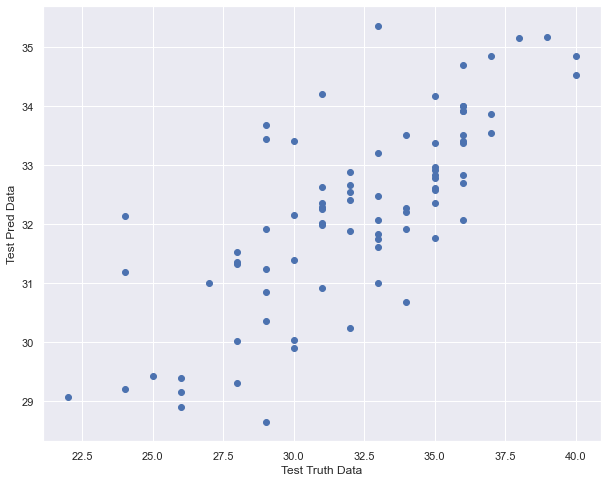

In [167]:
plt.scatter(y_test,en_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Pred Data")

In [169]:
# en_residuals = y_test-en_pred

In [170]:
## Performance Metrics
print(mean_squared_error(y_test,en_pred))
print(mean_absolute_error(y_test,en_pred))
print(np.sqrt(mean_absolute_error(y_test,en_pred)))

8.301222298955278
2.3897442920249037
1.5458797792923302


In [171]:
# Overall
print('Liner Regression Model')
print("mse: ",mean_squared_error(y_test,reg_pred))
print("mae: ",mean_absolute_error(y_test,reg_pred))
print("Sq_root of mae: ",np.sqrt(mean_absolute_error(y_test,reg_pred)))
print('---------------')
print()
print('Ridge Regression Model')
print("mse: ",mean_squared_error(y_test,ridge_pred))
print("mae: ",mean_absolute_error(y_test,ridge_pred))
print("Sq_root of mae: ",np.sqrt(mean_absolute_error(y_test,ridge_pred)))
print('---------------')
print()
print('Lasso Regression Model')
print("mse: ",mean_squared_error(y_test,lasso_pred))
print("mae: ",mean_absolute_error(y_test,lasso_pred))
print("Sq_root of mae: ",np.sqrt(mean_absolute_error(y_test,lasso_pred)))
print('---------------')
print()
print('ElasticNet Regression Model')
print("mse: ",mean_squared_error(y_test,en_pred))
print("mae: ",mean_absolute_error(y_test,en_pred))
print("Sq_root of mae: ",np.sqrt(mean_absolute_error(y_test,en_pred)))
print('---------------')

Liner Regression Model
mse:  6.629070108175489
mae:  2.1303926790907384
Sq_root of mae:  1.4595864753726442
---------------

Ridge Regression Model
mse:  6.630286006219479
mae:  2.1298488303850722
Sq_root of mae:  1.4594001611569982
---------------

Lasso Regression Model
mse:  9.10609532182792
mae:  2.4978660766652734
Sq_root of mae:  1.5804638802153226
---------------

ElasticNet Regression Model
mse:  8.301222298955278
mae:  2.3897442920249037
Sq_root of mae:  1.5458797792923302
---------------
